In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
violencia_a = pd.read_csv('denuncias_mensuales.csv')

In [3]:
violencia_a

,Unnamed: 0,index,anio,mes,denuncias_mes
0,0,3,2016,Enero,1315
1,1,4,2016,Febrero,1533
2,2,7,2016,Marzo,1541
3,3,0,2016,Abril,1739
4,4,8,2016,Mayo,1844
5,5,6,2016,Junio,1780
6,6,5,2016,Julio,1434
7,7,1,2016,Agosto,1601
8,8,11,2016,Septiembre,1521
9,9,10,2016,Octubre,1532


In [4]:
del violencia_a['index']

In [5]:
del violencia_a['anio']

In [6]:
del violencia_a['mes']

In [7]:
violencia_a

,Unnamed: 0,denuncias_mes
0,0,1315
1,1,1533
2,2,1541
3,3,1739
4,4,1844
5,5,1780
6,6,1434
7,7,1601
8,8,1521
9,9,1532


In [8]:
arr = violencia_a.to_numpy()

In [9]:
arr

array([[   0, 1315],
       [   1, 1533],
       [   2, 1541],
       [   3, 1739],
       [   4, 1844],
       [   5, 1780],
       [   6, 1434],
       [   7, 1601],
       [   8, 1521],
       [   9, 1532],
       [  10, 1334],
       [  11, 1384],
       [  12, 1387],
       [  13, 1346],
       [  14, 1584],
       [  15, 1511],
       [  16, 1659],
       [  17, 1712],
       [  18, 1490],
       [  19, 1697],
       [  20, 1561],
       [  21, 1611],
       [  22, 1447],
       [  23, 1430],
       [  24, 1449],
       [  25, 1532],
       [  26, 1769],
       [  27, 1877],
       [  28, 1892],
       [  29, 1655],
       [  30, 1745],
       [  31, 1582],
       [  32, 1673],
       [  33, 1676],
       [  34, 1570],
       [  35, 1513],
       [  36, 1609],
       [  37, 1754],
       [  38, 2205],
       [  39, 2171],
       [  40, 2477],
       [  41, 2156],
       [  42, 2206],
       [  43, 2402],
       [  44, 2315],
       [  45, 2193],
       [  46, 2114],
       [  47,

In [10]:
y = arr[:,1]

In [11]:
y

array([1315, 1533, 1541, 1739, 1844, 1780, 1434, 1601, 1521, 1532, 1334,
       1384, 1387, 1346, 1584, 1511, 1659, 1712, 1490, 1697, 1561, 1611,
       1447, 1430, 1449, 1532, 1769, 1877, 1892, 1655, 1745, 1582, 1673,
       1676, 1570, 1513, 1609, 1754, 2205, 2171, 2477, 2156, 2206, 2402,
       2315, 2193, 2114, 2174, 2064, 2482, 2792, 1786, 1550])

In [12]:
x = arr[:,0]

In [13]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [14]:
coefficients1 = np.polyfit(x, y, 1)

In [15]:
coefficients2 = np.polyfit(x,y,2)

In [16]:
coefficients3 = np.polyfit(x,y,3)

In [17]:
splines = interp1d(x,y,kind = 'cubic')
nevals = 10000
xevals = np.linspace(min(x),max(x),nevals)
yevals = splines(xevals)

In [18]:
y_pol_1 = np.polyval(coefficients1, x)
y_pol_2 = np.polyval(coefficients2, x)
y_pol_3 = np.polyval(coefficients3, x)
y_spl = splines(x)

In [19]:
violencia_b = pd.read_csv('denuncias_mensuales.csv')

In [20]:
violencia_b

,Unnamed: 0,index,anio,mes,denuncias_mes
0,0,3,2016,Enero,1315
1,1,4,2016,Febrero,1533
2,2,7,2016,Marzo,1541
3,3,0,2016,Abril,1739
4,4,8,2016,Mayo,1844
5,5,6,2016,Junio,1780
6,6,5,2016,Julio,1434
7,7,1,2016,Agosto,1601
8,8,11,2016,Septiembre,1521
9,9,10,2016,Octubre,1532


In [21]:
violencia_b['anio'] = violencia_b['anio'].apply(str)

In [22]:
violencia_b['mes'] = violencia_b['mes'].apply(str)

In [23]:
violencia_b['fecha'] = violencia_b['mes']+' '+ violencia_b['anio']

In [24]:
violencia_b

,Unnamed: 0,index,anio,mes,denuncias_mes,fecha
0,0,3,2016,Enero,1315,Enero 2016
1,1,4,2016,Febrero,1533,Febrero 2016
2,2,7,2016,Marzo,1541,Marzo 2016
3,3,0,2016,Abril,1739,Abril 2016
4,4,8,2016,Mayo,1844,Mayo 2016
5,5,6,2016,Junio,1780,Junio 2016
6,6,5,2016,Julio,1434,Julio 2016
7,7,1,2016,Agosto,1601,Agosto 2016
8,8,11,2016,Septiembre,1521,Septiembre 2016
9,9,10,2016,Octubre,1532,Octubre 2016


In [25]:
violencia_b = np.array(violencia_b)

In [26]:
violencia_b

array([[0, 3, '2016', 'Enero', 1315, 'Enero 2016'],
       [1, 4, '2016', 'Febrero', 1533, 'Febrero 2016'],
       [2, 7, '2016', 'Marzo', 1541, 'Marzo 2016'],
       [3, 0, '2016', 'Abril', 1739, 'Abril 2016'],
       [4, 8, '2016', 'Mayo', 1844, 'Mayo 2016'],
       [5, 6, '2016', 'Junio', 1780, 'Junio 2016'],
       [6, 5, '2016', 'Julio', 1434, 'Julio 2016'],
       [7, 1, '2016', 'Agosto', 1601, 'Agosto 2016'],
       [8, 11, '2016', 'Septiembre', 1521, 'Septiembre 2016'],
       [9, 10, '2016', 'Octubre', 1532, 'Octubre 2016'],
       [10, 9, '2016', 'Noviembre', 1334, 'Noviembre 2016'],
       [11, 2, '2016', 'Diciembre', 1384, 'Diciembre 2016'],
       [12, 15, '2017', 'Enero', 1387, 'Enero 2017'],
       [13, 16, '2017', 'Febrero', 1346, 'Febrero 2017'],
       [14, 19, '2017', 'Marzo', 1584, 'Marzo 2017'],
       [15, 12, '2017', 'Abril', 1511, 'Abril 2017'],
       [16, 20, '2017', 'Mayo', 1659, 'Mayo 2017'],
       [17, 18, '2017', 'Junio', 1712, 'Junio 2017'],
       [18, 

In [28]:
g = violencia_b[:,5]

In [29]:
g

array(['Enero 2016', 'Febrero 2016', 'Marzo 2016', 'Abril 2016',
       'Mayo 2016', 'Junio 2016', 'Julio 2016', 'Agosto 2016',
       'Septiembre 2016', 'Octubre 2016', 'Noviembre 2016',
       'Diciembre 2016', 'Enero 2017', 'Febrero 2017', 'Marzo 2017',
       'Abril 2017', 'Mayo 2017', 'Junio 2017', 'Julio 2017',
       'Agosto 2017', 'Septiembre 2017', 'Octubre 2017', 'Noviembre 2017',
       'Diciembre 2017', 'Enero 2018', 'Febrero 2018', 'Marzo 2018',
       'Abril 2018', 'Mayo 2018', 'Junio 2018', 'Julio 2018',
       'Agosto 2018', 'Septiembre 2018', 'Octubre 2018', 'Noviembre 2018',
       'Diciembre 2018', 'Enero 2019', 'Febrero 2019', 'Marzo 2019',
       'Abril 2019', 'Mayo 2019', 'Junio 2019', 'Julio 2019',
       'Agosto 2019', 'Septiembre 2019', 'Octubre 2019', 'Noviembre 2019',
       'Diciembre 2019', 'Enero 2020', 'Febrero 2020', 'Marzo 2020',
       'Abril 2020', 'Mayo 2020'], dtype=object)

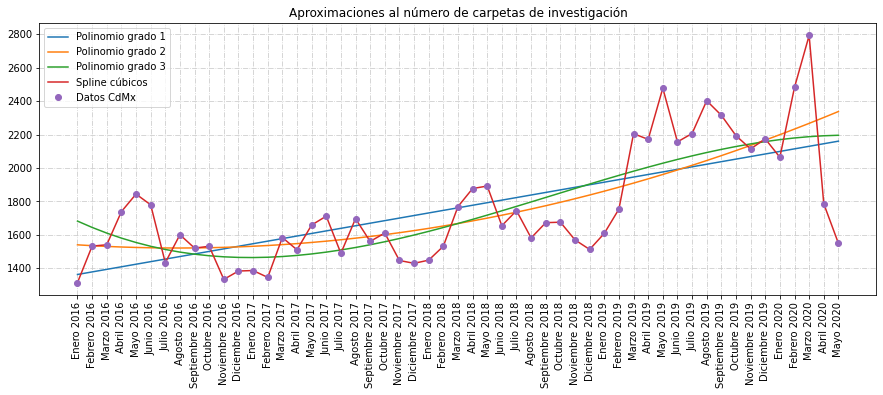

In [66]:
fig = plt.figure(figsize=(15, 5))
plt.plot(g, y_pol_1,
         g, y_pol_2,
         g, y_pol_3,
         g, y_spl, 
         g, y, 'o')
plt.legend(["Polinomio grado 1",
           "Polinomio grado 2",
           "Polinomio grado 3",
           "Spline cúbicos",
           "Datos CdMx"])
plt.title("Aproximaciones al número de carpetas de investigación")
plt.xticks(rotation='vertical',fontsize=10)
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.grid(True)
plt.savefig('Aprox_carpetas.png')
plt.show()

In [52]:
x_estim = np.array([53,54,55,56,57,58,59])

In [53]:
y_estim_1 = np.polyval(coefficients1, x_estim)
y_estim_2 = np.polyval(coefficients2, x_estim)
y_estim_3 = np.polyval(coefficients3, x_estim)
f = interp1d(x, y_spl, fill_value='extrapolate')
y_estim_spl = f(x_estim)

In [54]:
y_estim_spl

array([1314., 1078.,  842.,  606.,  370.,  134., -102.])

In [55]:
y1 = np.hstack((y_pol_1,y_estim_1))

In [56]:
y1

array([1363.360587  , 1378.68561522, 1394.01064344, 1409.33567167,
       1424.66069989, 1439.98572811, 1455.31075633, 1470.63578455,
       1485.96081277, 1501.28584099, 1516.61086921, 1531.93589744,
       1547.26092566, 1562.58595388, 1577.9109821 , 1593.23601032,
       1608.56103854, 1623.88606676, 1639.21109498, 1654.53612321,
       1669.86115143, 1685.18617965, 1700.51120787, 1715.83623609,
       1731.16126431, 1746.48629253, 1761.81132075, 1777.13634898,
       1792.4613772 , 1807.78640542, 1823.11143364, 1838.43646186,
       1853.76149008, 1869.0865183 , 1884.41154652, 1899.73657475,
       1915.06160297, 1930.38663119, 1945.71165941, 1961.03668763,
       1976.36171585, 1991.68674407, 2007.01177229, 2022.33680052,
       2037.66182874, 2052.98685696, 2068.31188518, 2083.6369134 ,
       2098.96194162, 2114.28696984, 2129.61199806, 2144.93702629,
       2160.26205451, 2175.58708273, 2190.91211095, 2206.23713917,
       2221.56216739, 2236.88719561, 2252.21222383, 2267.53725

In [57]:
y2 = np.hstack((y_pol_2,y_estim_2))

In [58]:
y3 = np.hstack((y_pol_3,y_estim_3))

In [59]:
splin = np.hstack((y_spl,y_estim_spl))

In [60]:
w = ["Junio 2020", "Julio 2020", "Agosto 2020", "Septiembre 2020", "Octubre 2020", "Noviembre 2020", "Diciembre 2020"]

In [61]:
x_eval = np.hstack((g,w))

In [62]:
x_eval

array(['Enero 2016', 'Febrero 2016', 'Marzo 2016', 'Abril 2016',
       'Mayo 2016', 'Junio 2016', 'Julio 2016', 'Agosto 2016',
       'Septiembre 2016', 'Octubre 2016', 'Noviembre 2016',
       'Diciembre 2016', 'Enero 2017', 'Febrero 2017', 'Marzo 2017',
       'Abril 2017', 'Mayo 2017', 'Junio 2017', 'Julio 2017',
       'Agosto 2017', 'Septiembre 2017', 'Octubre 2017', 'Noviembre 2017',
       'Diciembre 2017', 'Enero 2018', 'Febrero 2018', 'Marzo 2018',
       'Abril 2018', 'Mayo 2018', 'Junio 2018', 'Julio 2018',
       'Agosto 2018', 'Septiembre 2018', 'Octubre 2018', 'Noviembre 2018',
       'Diciembre 2018', 'Enero 2019', 'Febrero 2019', 'Marzo 2019',
       'Abril 2019', 'Mayo 2019', 'Junio 2019', 'Julio 2019',
       'Agosto 2019', 'Septiembre 2019', 'Octubre 2019', 'Noviembre 2019',
       'Diciembre 2019', 'Enero 2020', 'Febrero 2020', 'Marzo 2020',
       'Abril 2020', 'Mayo 2020', 'Junio 2020', 'Julio 2020',
       'Agosto 2020', 'Septiembre 2020', 'Octubre 2020', 'Novie

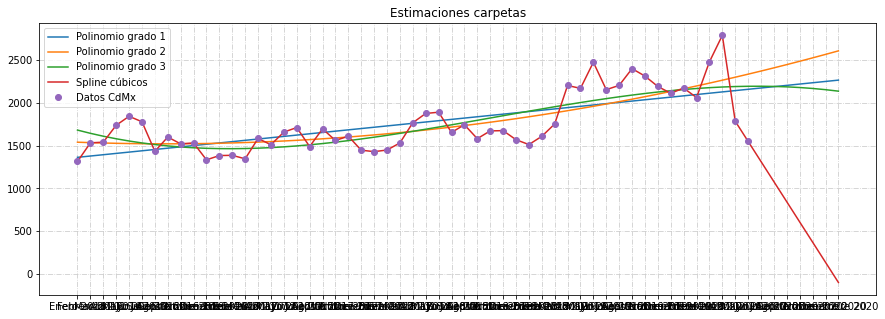

In [65]:
fig = plt.figure(figsize=(15, 5))
plt.plot(x_eval, y1,
         x_eval, y2,
         x_eval, y3,
         x_eval, splin,
         x, y, 'o')
plt.legend(["Polinomio grado 1",
           "Polinomio grado 2",
           "Polinomio grado 3",
           "Spline cúbicos",
           "Datos CdMx"])
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.grid(True)
plt.savefig('Estim_carpetas.png')
plt.title("Estimaciones carpetas")
plt.show()